In [96]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
train_data=pd.read_csv('D:/05_資料探勘/HW/train.csv')
test_data=pd.read_csv('D:/05_資料探勘/HW/test.csv')

In [97]:
train_data

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type
0,0,0.354512,0.350839,0.465761,0.781142,clear,Ghoul
1,1,0.575560,0.425868,0.531401,0.439899,green,Goblin
2,2,0.467875,0.354330,0.811616,0.791225,black,Ghoul
3,4,0.776652,0.508723,0.636766,0.884464,black,Ghoul
4,5,0.566117,0.875862,0.418594,0.636438,green,Ghost
...,...,...,...,...,...,...,...
366,886,0.458132,0.391760,0.660590,0.635689,blue,Goblin
367,889,0.331936,0.564836,0.539216,0.551471,green,Ghost
368,890,0.481640,0.501147,0.496446,0.544003,clear,Ghoul
369,896,0.294943,0.771286,0.583503,0.300618,clear,Ghost


In [98]:
train_data.isnull().sum()

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
type             0
dtype: int64

In [99]:
train_data.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,443.676550,0.434160,0.506848,0.529114,0.471392
std,263.222489,0.132833,0.146358,0.169902,0.176129
min,0.000000,0.061032,0.095687,0.134600,0.009402
25%,205.500000,0.340006,0.414812,0.407428,0.348002
50%,458.000000,0.434891,0.501552,0.538642,0.466372
75%,678.500000,0.517223,0.603977,0.647244,0.600610
max,897.000000,0.817001,0.932466,1.000000,0.935721


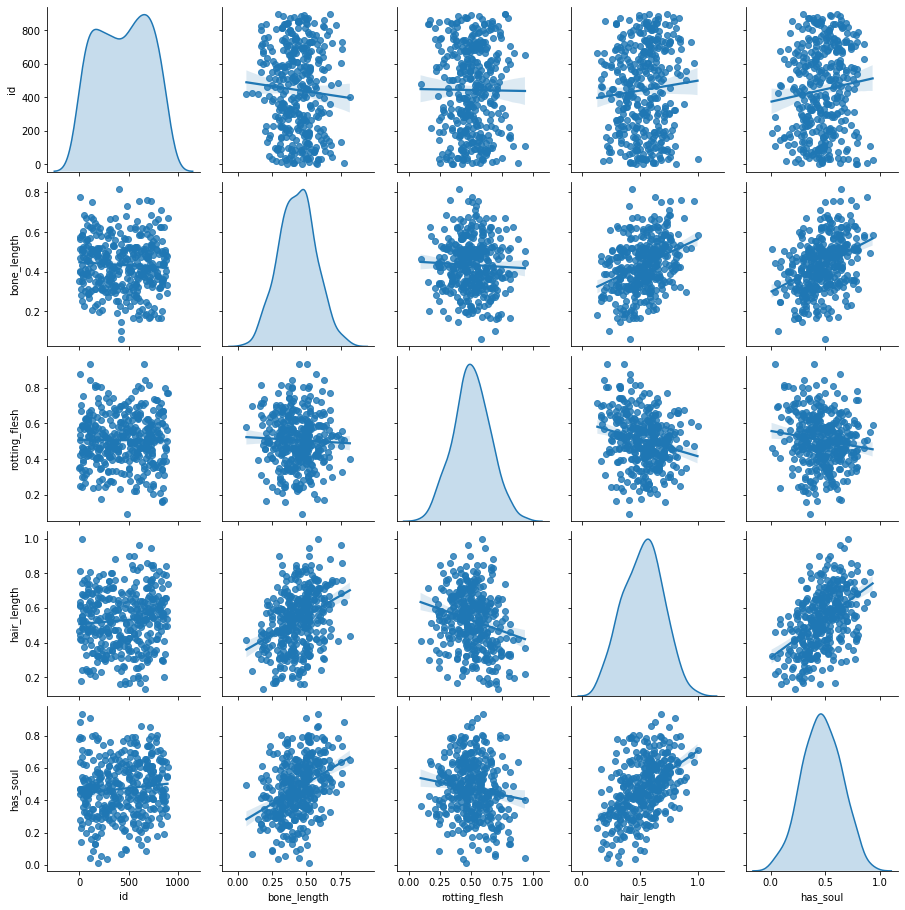

In [100]:
sns.pairplot(train_data,kind="reg",diag_kind="kde")

In [101]:
test_data

,id,bone_length,rotting_flesh,hair_length,has_soul,color
0,3,0.471774,0.387937,0.706087,0.698537,black
1,6,0.427332,0.645024,0.565558,0.451462,white
2,9,0.549602,0.491931,0.660387,0.449809,black
3,10,0.638095,0.682867,0.471409,0.356924,white
4,13,0.361762,0.583997,0.377256,0.276364,black
...,...,...,...,...,...,...
524,893,0.377573,0.390158,0.696465,0.355373,blue
525,894,0.229161,0.601265,0.191282,0.475115,clear
526,895,0.510497,0.498347,0.708020,0.714154,white
527,898,0.331472,0.765835,0.338207,0.193431,clear


In [102]:
test_data.isnull().sum()

id               0
bone_length      0
rotting_flesh    0
hair_length      0
has_soul         0
color            0
dtype: int64

In [103]:
test_data.describe()

,id,bone_length,rotting_flesh,hair_length,has_soul
count,529.000000,529.000000,529.000000,529.000000,529.000000
mean,453.584121,0.425474,0.503637,0.517288,0.464096
std,257.804948,0.136079,0.158552,0.171727,0.179659
min,3.000000,0.000000,0.000000,0.000000,0.000000
25%,239.000000,0.329383,0.393987,0.388189,0.338964
50%,445.000000,0.421989,0.510065,0.520220,0.461294
75%,670.000000,0.519024,0.605957,0.644824,0.584448
max,899.000000,1.000000,1.000000,0.999841,1.000000


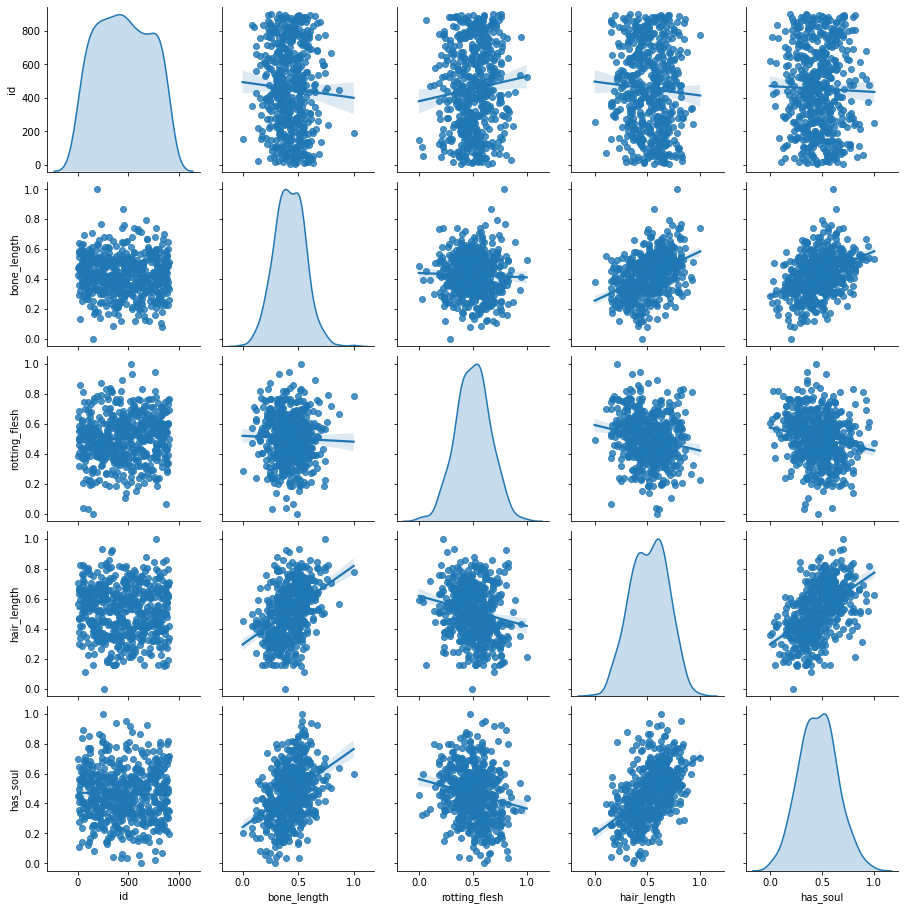

In [104]:
sns.pairplot(test_data,kind="reg",diag_kind="kde")

In [105]:
#對類別特徵進行編碼：查看type及color的項目個數，並轉換成數值
pd.crosstab(train_data['color'],train_data['type']) 

type,Ghost,Ghoul,Goblin
color,,,
black,14,14,13
blood,6,4,2
blue,6,6,7
clear,32,42,46
green,15,13,14
white,44,50,43


In [143]:
index_test=test['id']

In [111]:
#將color轉成數值
combine = [train_data,test_data]
color_mapping = {"blood":1, "blue":2, "black":3,"green":4,"clear":5,"white":6}

for dataset in combine:
    dataset['color_num'] = dataset['color']
    dataset['color_num'] = dataset['color_num'].map(color_mapping)
    dataset['color_num'] = dataset['color_num'].fillna(0)

train_data = train_data.drop(['color','id'],axis=1)
train_data.head()

,bone_length,rotting_flesh,hair_length,has_soul,type,color_num
0,0.354512,0.350839,0.465761,0.781142,3,5
1,0.575560,0.425868,0.531401,0.439899,2,4
2,0.467875,0.354330,0.811616,0.791225,3,3
3,0.776652,0.508723,0.636766,0.884464,3,3
4,0.566117,0.875862,0.418594,0.636438,1,4


In [112]:
test_data = test_data.drop(['color','id'],axis=1)
test_data.head()

,bone_length,rotting_flesh,hair_length,has_soul,color_num
0,0.471774,0.387937,0.706087,0.698537,3
1,0.427332,0.645024,0.565558,0.451462,6
2,0.549602,0.491931,0.660387,0.449809,3
3,0.638095,0.682867,0.471409,0.356924,6
4,0.361762,0.583997,0.377256,0.276364,3


In [108]:
#將訓練集的type轉換成數值

type_mapping = {"Ghoul":3, "Goblin":2, "Ghost":1}
train_data['type'] = train_data['type'].map(type_mapping)
train_data['type'] = train_data['type'].fillna(0)

train_data.head()

,id,bone_length,rotting_flesh,hair_length,has_soul,color,type,color_num
0,0,0.354512,0.350839,0.465761,0.781142,clear,3,5
1,1,0.575560,0.425868,0.531401,0.439899,green,2,4
2,2,0.467875,0.354330,0.811616,0.791225,black,3,3
3,4,0.776652,0.508723,0.636766,0.884464,black,3,3
4,5,0.566117,0.875862,0.418594,0.636438,green,1,4


In [161]:
X_train = train_data.drop(['type'],axis=1)
Y_train = train_data['type']
X_test  = test_data
X_train.shape, Y_train.shape,X_test.shape

((371, 5), (371,), (529, 5))

In [162]:
#LogisticRegression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train,Y_train)
Y_pred_1 = logreg.predict(X_test)
score_logreg = round(logreg.score(X_train,Y_train)*100,2)
score_logreg

75.74

In [163]:
#RandomForest
from sklearn.ensemble import RandomForestClassifier

random_forest =RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred_2 = random_forest.predict(X_test)
score_random_forest = round(random_forest.score(X_train, Y_train) *100 ,2)
score_random_forest

100.0

In [164]:
#SVM
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train,Y_train)
Y_pred_3 = svc.predict(X_test)
score_svc = round(svc.score(X_train,Y_train)*100,2)
score_svc

70.89

In [165]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

knn =KNeighborsClassifier(n_neighbors =3)
knn.fit(X_train, Y_train)
Y_pred_4 = knn.predict(X_test)
score_knn = round(knn.score(X_train, Y_train) *100 ,2)
score_knn

83.02

In [166]:
#AdaBoost

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(n_estimators = 50)
ada.fit(X_train, Y_train)
Y_pred_5 = ada.predict(X_test)
score_ada = round(ada.score(X_train, Y_train) *100 ,2)
score_ada

73.58

In [172]:
models = pd.DataFrame({
    'Model' : [ 'Logistic Regression','Random Forest',
                'Support Vector Machines','KNN','AdaBoost'],
    'Score' : [score_logreg , score_random_forest , 
               score_svc , score_knn , score_ada]})
models.sort_values(by='Score', ascending = False)

,Model,Score
1,Random Forest,100.00
3,KNN,83.02
0,Logistic Regression,75.74
4,AdaBoost,73.58
2,Support Vector Machines,70.89


In [173]:
#挑選要用的演算法並整理輸出格式
submission=pd.DataFrame()
submission['id']=index_test
submission['type']=Y_pred_2

#將數字轉換回鬼的名稱
type_remapping = {3:"Ghoul", 2:"Goblin", 1:"Ghost"}
submission['type'] = submission['type'].map(type_remapping)

submission


,id,type
0,3,Ghoul
1,6,Goblin
2,9,Ghoul
3,10,Ghost
4,13,Ghost
...,...,...
524,893,Goblin
525,894,Ghost
526,895,Ghoul
527,898,Ghost


In [174]:
#輸出csv
submission.to_csv("submission_09370012.csv",sep=',',header=True,index=None)